In [ ]:
"""
README

Section 1: understand the given data sets and to pre-process the data based on life experience and knowledge of electricity.

    Both of the data given are based on the building's solar cells, thus the time of day is scaled at half-hourly intervals to 
    make the data more meaningful. The sunlight conditions also vary throughout the year, by using the different seasons as 
    intervals for averaging the data also emphasises the meaning of the data. After that, converting all negative values to 
    value zero in the dataset.

Section 2: visualise the data and show the results.

    The comparison between Building 49 and 78 for data PV_W and PV_Wh (in each quater) and the combination of Building 49 and 
    78 (consider the two buildings as a unit) for data PV_W and PV_Wh (in each quater) as well.

Section 3: data analysis based on graphs.

    By combining the trends in the line graph below with the specific values at each node, we can see that the intensity of 
    sunshine was significantly stronger in quarters 3 and 4 (June to December in year 21) than in the first half of the year.
    Quarter 4 (September to December) also has the longest period of sunshine. Figure 9 - figure 13 shows that building 49 has 
    a larger number or more efficient equipment for converting solar energy into electricity.

"""

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

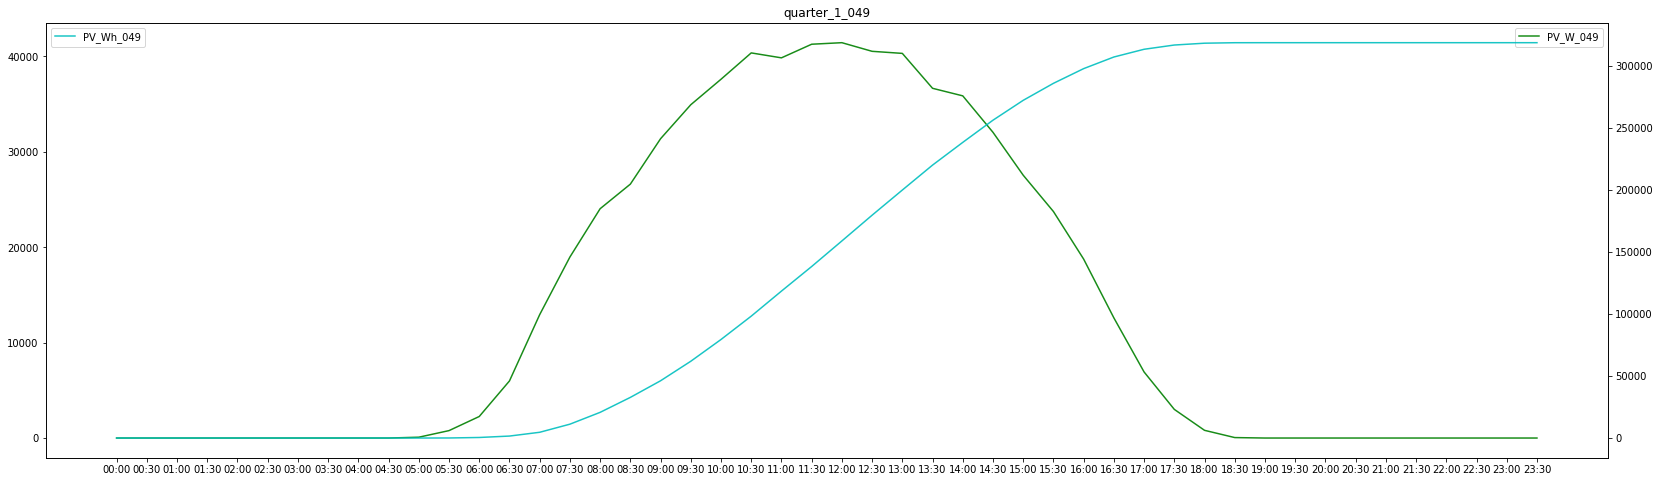

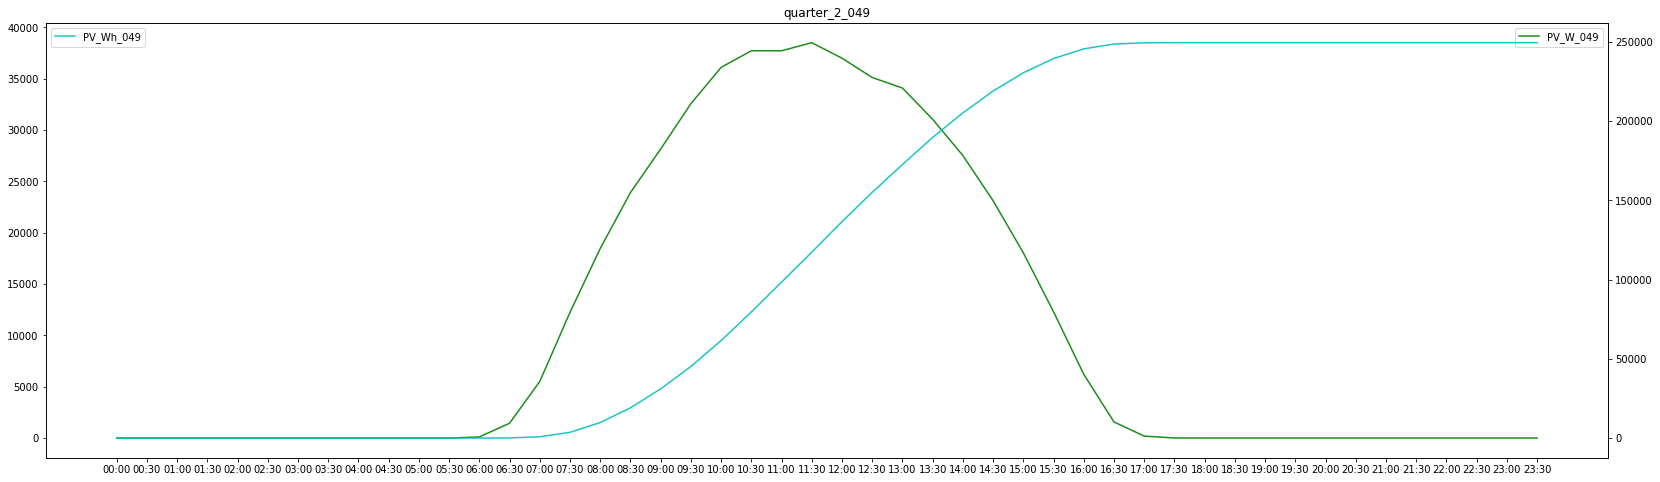

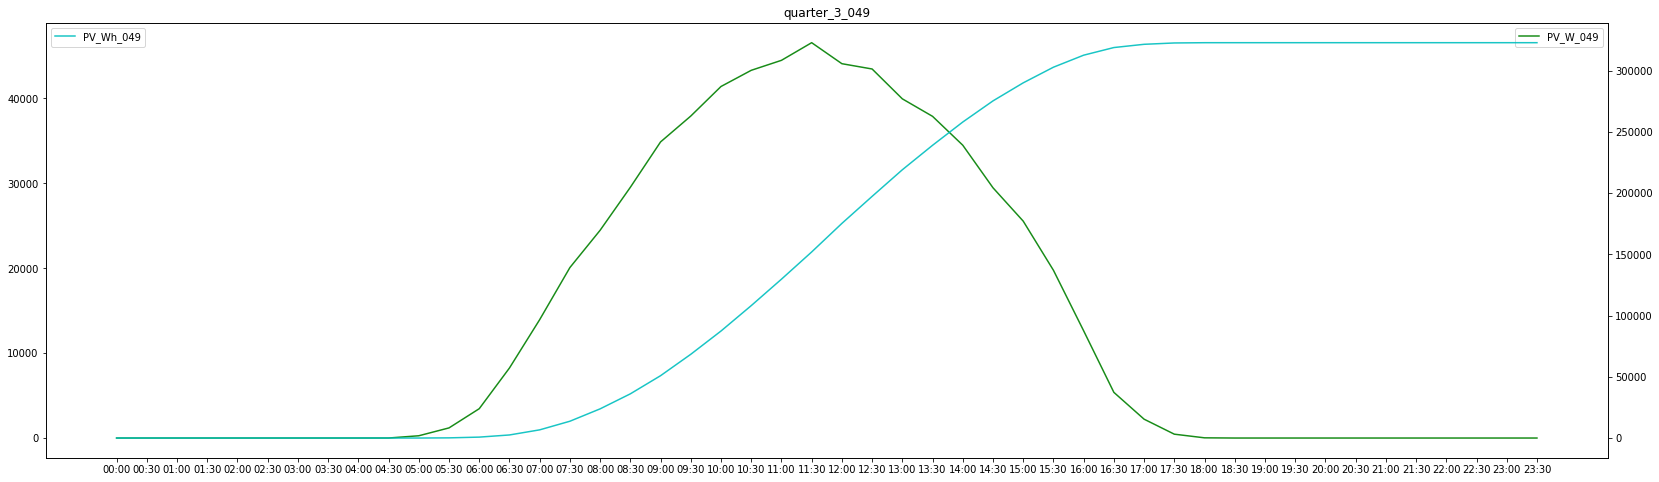

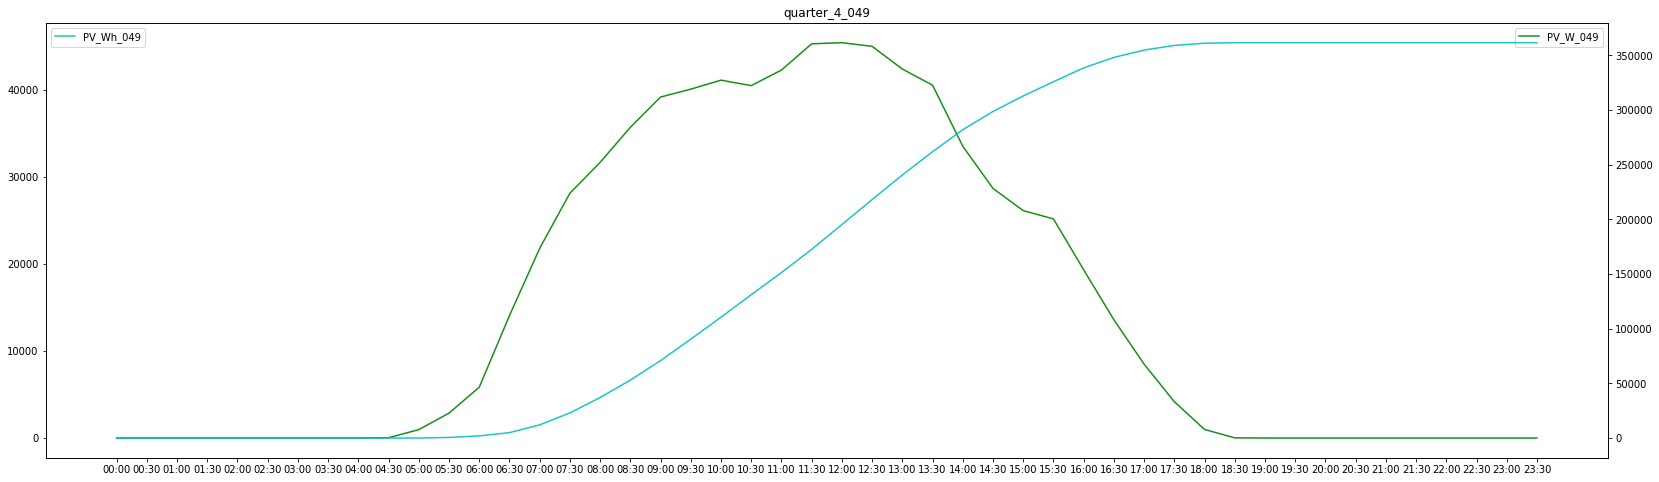

In [5]:
#read Excel files within a file folder
path = r'C:\Users\dell\OneDrive\Desktop\data visualization\049'
filenames = os.listdir(path)
# for filename in filenames:
#     print(filename)
df_all=pd.DataFrame()
#read csv files
for i in filenames:
    excel_path = r'C:\Users\dell\OneDrive\Desktop\data visualization\049\\' + i
    f = open(excel_path,'rb')
    df = pd.read_csv(f)
    df_all=df_all.append(df)

#process the negative values in PV_W_049 file to zero
df_all['PV_W_049'][df_all['PV_W_049'] < 0] = 0 
#detect and process abnormal values
def outliners(data,col,scale=3):
    def box_plot_outliners(data_ser,box_scale):
        IQR=box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
        val_low=data_ser.quantile(0.25)-IQR
        val_up=data_ser.quantile(0.75)+IQR
        rule_low=(data_ser<val_low)
        rule_up=(data_ser>val_up)
        return rule_low,rule_up,val_low,val_up
    data_n=data.copy()
    data_series=data_n[col]
    rule_low,rule_up,val_low,val_up=box_plot_outliners(data_series,box_scale=scale)
    data_n[col].loc[rule_up]=val_up
    data_n[col].loc[rule_low]=val_low
    return data_n
df_all=outliners(df_all,'PV_Wh_049',scale=3)

#format date and set index
df_all.Date=pd.to_datetime(df_all['Date'])
df_all['datetime'] = df_all.Date.astype(str) + ' ' + df_all.Time.astype(str)
df_all.datetime=pd.to_datetime(df_all['datetime'])
df_all=df_all.set_index('datetime')
df_all_half_hour_PV_Wh=pd.DataFrame(df_all['PV_Wh_049']) 
#average PV_W minute level data in half an hour
df_all_half_hour_PV_W=pd.DataFrame(df_all['PV_W_049'].resample(rule = '0.5H').mean())
#merge data of PV_Wh by every 30 minutes
df_all_half_hour=pd.merge(df_all_half_hour_PV_W,df_all_half_hour_PV_Wh,left_index=True,right_index=True,how='left') 
#set time period
df_all_half_hour['quarter']=df_all_half_hour.index.map(lambda x: int(x.month/4)+1)
#half an hour label
df_all_half_hour['half_hour']=df_all_half_hour.index.strftime('%H:%M')
df_all_half_hour_049=df_all_half_hour
#generate diagram for building 049
for i in range(1,5):
    #values for each quarter
    data=df_all_half_hour_049[df_all_half_hour_049.quarter==i]
    data_hour_1=data['PV_W_049'].groupby(data['half_hour']).mean()
    data_hour_2=data['PV_Wh_049'].groupby(data['half_hour']).mean()
    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    #primary axis
    ax1.plot(data_hour_1,label='PV_W_049', color='g', alpha=0.9)
    #secondary axis
    ax2.plot(data_hour_2, label='PV_Wh_049', color='c', alpha=0.9)
    plt.title("quarter_{}_049".format(i))
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    plt.savefig("quarter_{}_049".format(i),dpi=400)
    plt.show()    

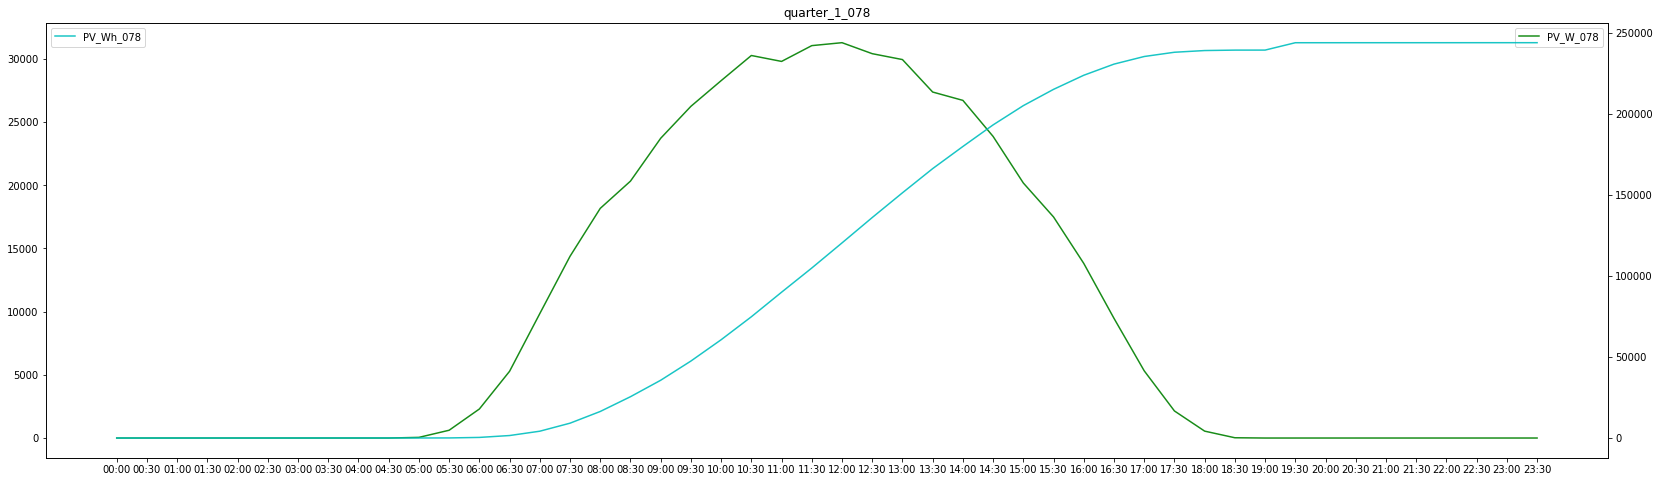

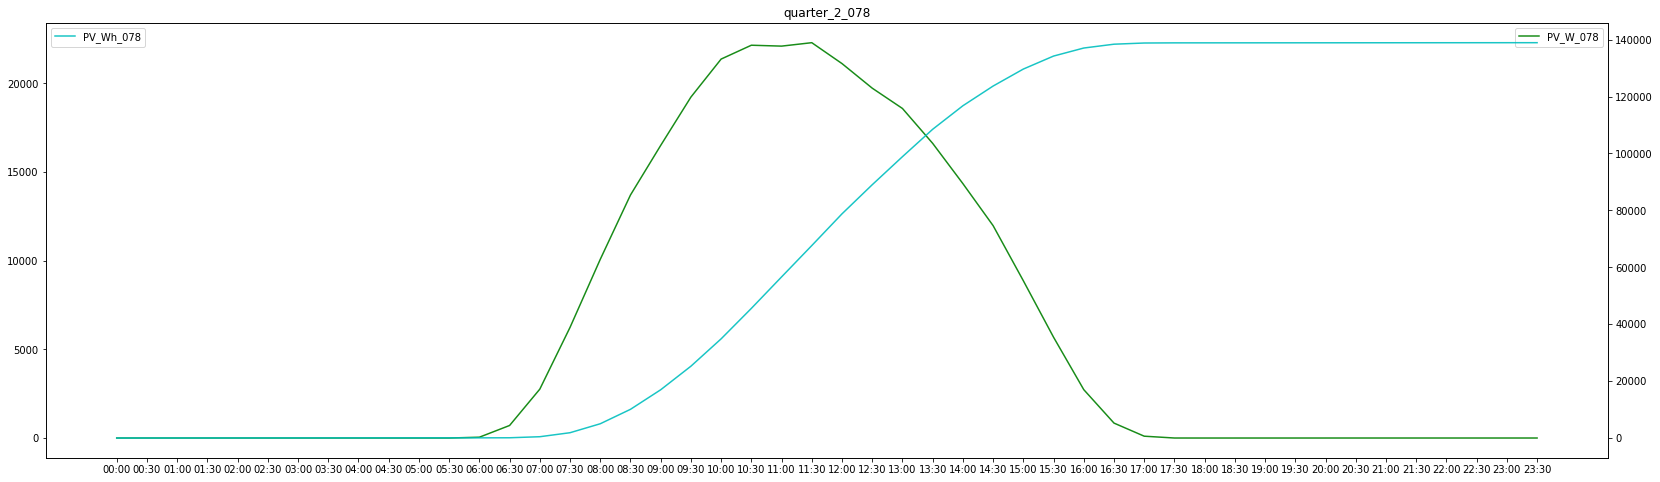

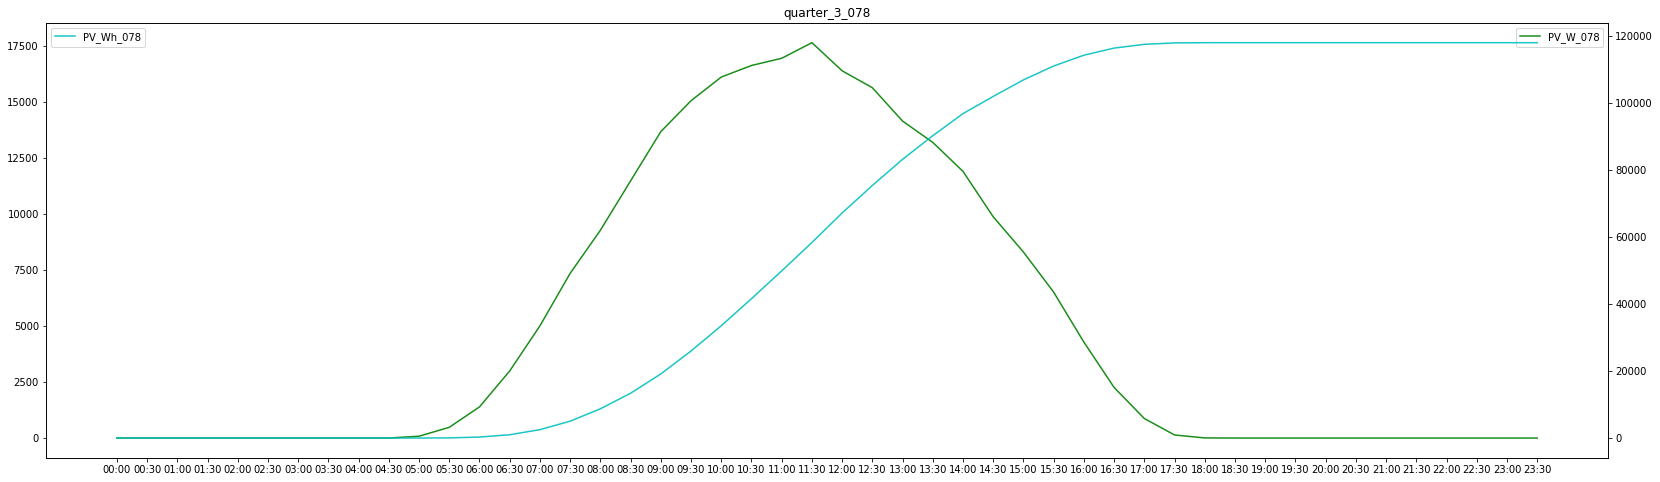

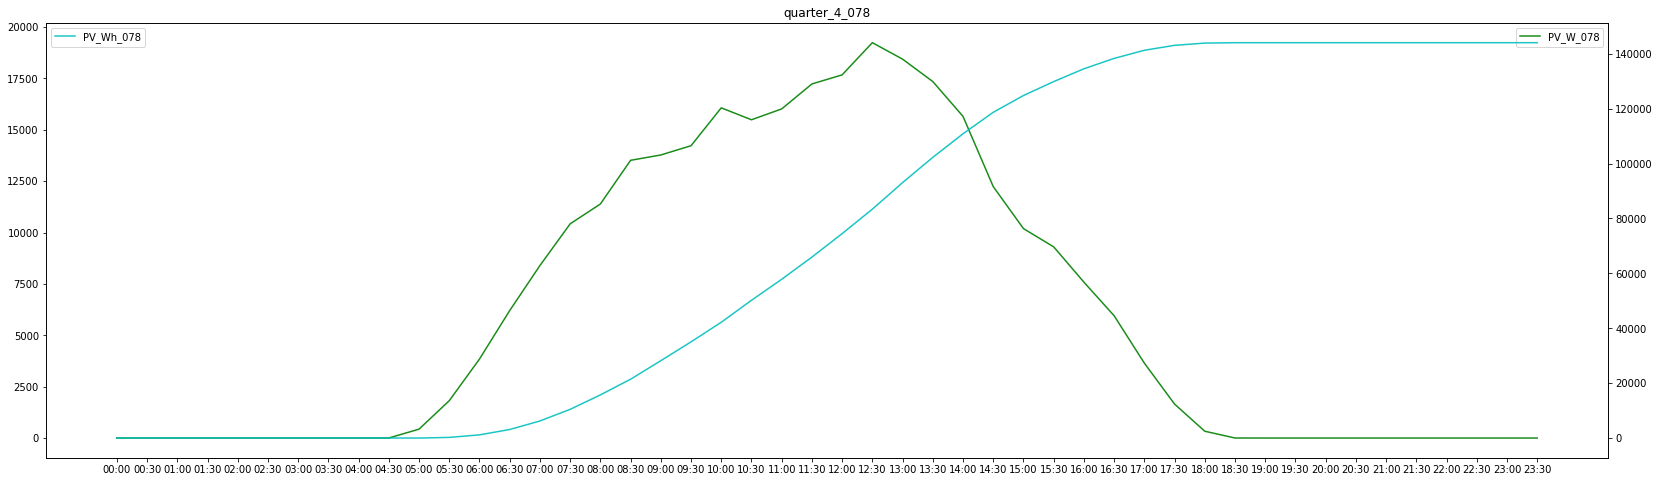

In [6]:
#read all the excel files in the folder
path = r'C:\Users\dell\OneDrive\Desktop\data visualization\078'
filenames = os.listdir(path)
# for filename in filenames:
#     print(filename)
df_all=pd.DataFrame()
#read all the csv files
for i in filenames:
    excel_path = r'C:\Users\dell\OneDrive\Desktop\data visualization\078\\' + i
    f = open(excel_path,'rb')
    df = pd.read_csv(f)
    df_all=df_all.append(df)

#process the negative values in PV_W_078 file to zero
df_all['PV_W_078'][df_all['PV_W_078'] < 0] = 0 
def outliners(data,col,scale=3):
    def box_plot_outliners(data_ser,box_scale):
        IQR=box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
        val_low=data_ser.quantile(0.25)-IQR
        val_up=data_ser.quantile(0.75)+IQR
        rule_low=(data_ser<val_low)
        rule_up=(data_ser>val_up)
        return rule_low,rule_up,val_low,val_up
    data_n=data.copy()
    data_series=data_n[col]
    rule_low,rule_up,val_low,val_up=box_plot_outliners(data_series,box_scale=scale)
    data_n[col].loc[rule_up]=val_up
    data_n[col].loc[rule_low]=val_low
    return data_n
df_all=outliners(df_all,'PV_Wh_078',scale=3)
#format date and set index
df_all.Date=pd.to_datetime(df_all['Date'])
df_all['datetime'] = df_all.Date.astype(str) + ' ' + df_all.Time.astype(str)
df_all.datetime=pd.to_datetime(df_all['datetime'])
df_all=df_all.set_index('datetime')
df_all_half_hour_PV_Wh=pd.DataFrame(df_all['PV_Wh_078']) 
#average PV_W minute level data in half an hour
df_all_half_hour_PV_W=pd.DataFrame(df_all['PV_W_078'].resample(rule = '0.5H').mean())
#merge data of PV_Wh by every 30 minutes
df_all_half_hour=pd.merge(df_all_half_hour_PV_W,df_all_half_hour_PV_Wh,left_index=True,right_index=True,how='left') 
#set time period
df_all_half_hour['quarter']=df_all_half_hour.index.map(lambda x: int(x.month/4)+1)
#half an hour label
df_all_half_hour['half_hour']=df_all_half_hour.index.strftime('%H:%M')
df_all_half_hour_078=df_all_half_hour
#generate diagram for building 078
for i in range(1,5):
    #values for each quarter
    data=df_all_half_hour_078[df_all_half_hour_078.quarter==i] 
    data_hour_1=data['PV_W_078'].groupby(data['half_hour']).mean()
    data_hour_2=data['PV_Wh_078'].groupby(data['half_hour']).mean()
    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    #primary axis
    ax1.plot(data_hour_1,label='PV_W_078', color='g', alpha=0.9)
    #secondary axis
    ax2.plot(data_hour_2, label='PV_Wh_078', color='c', alpha=0.9)
    plt.title("quarter_{}_078".format(i))
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    plt.savefig("quarter_{}_078".format(i),dpi=400)
    plt.show()    

In [24]:
#generate data for building 49 and 78 within one diagram 
df_all_half_hour_total=pd.concat([df_all_half_hour_078,df_all_half_hour_049],axis=1).dropna()
#delete duplicate columns
df_all_half_hour_total=df_all_half_hour_total.drop_duplicates().T.drop_duplicates().T 
df_all_half_hour_total

,PV_W_078,PV_Wh_078,quarter,half_hour,PV_W_049,PV_Wh_049
datetime,,,,,,
2021-01-01 00:00:00,0,0,1,00:00,0,0
2021-01-01 00:30:00,0,0,1,00:30,0,0
2021-01-01 01:00:00,0,0,1,01:00,0,0
2021-01-01 01:30:00,0,0,1,01:30,0,0
2021-01-01 02:00:00,0,0,1,02:00,0,0
...,...,...,...,...,...,...
2021-12-20 21:30:00,0,209656,4,21:30,0,460840
2021-12-20 22:00:00,0,209656,4,22:00,0,460840
2021-12-20 22:30:00,0,209656,4,22:30,0,460840


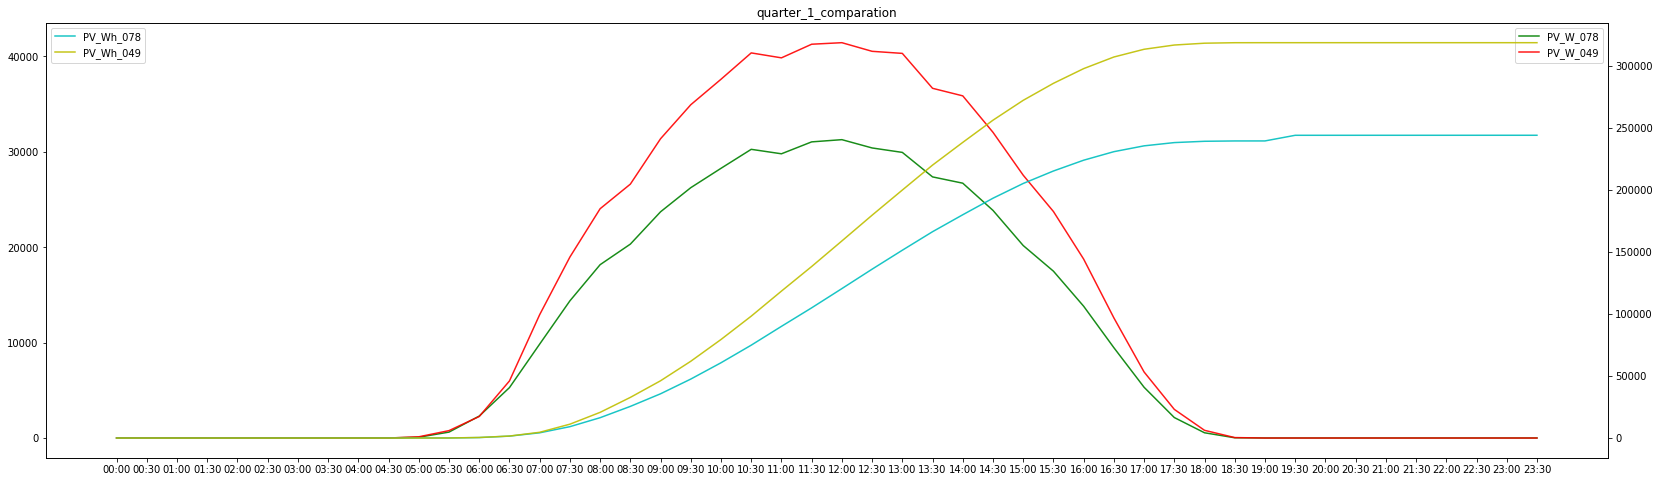

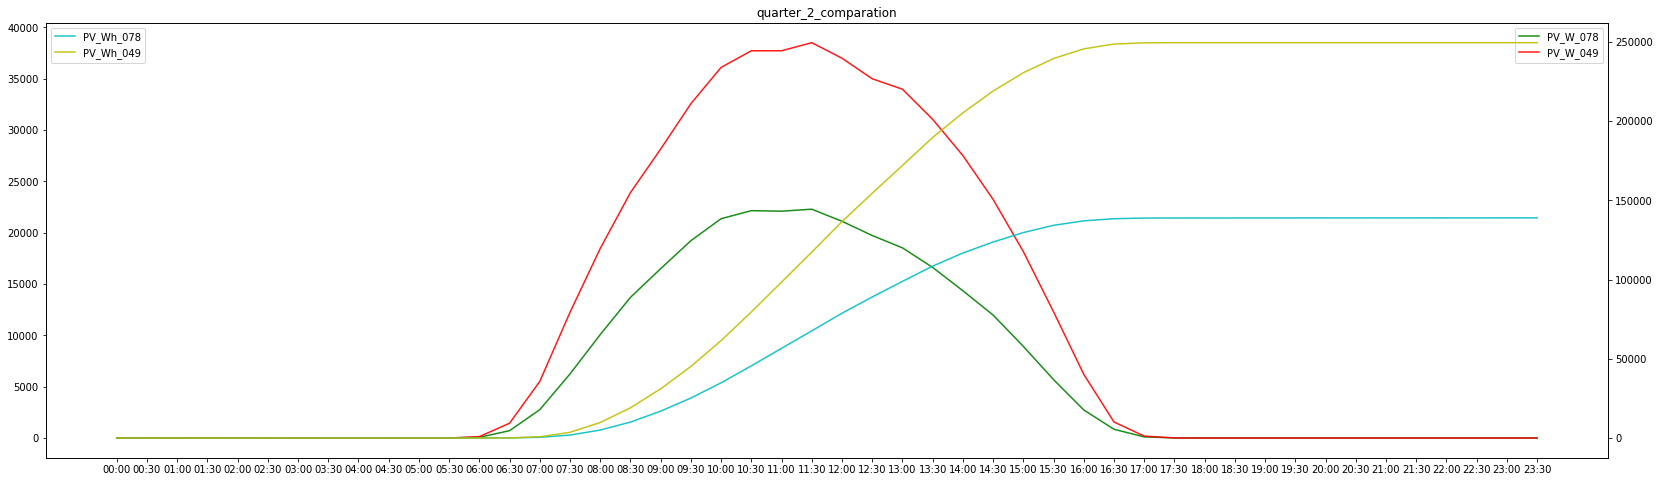

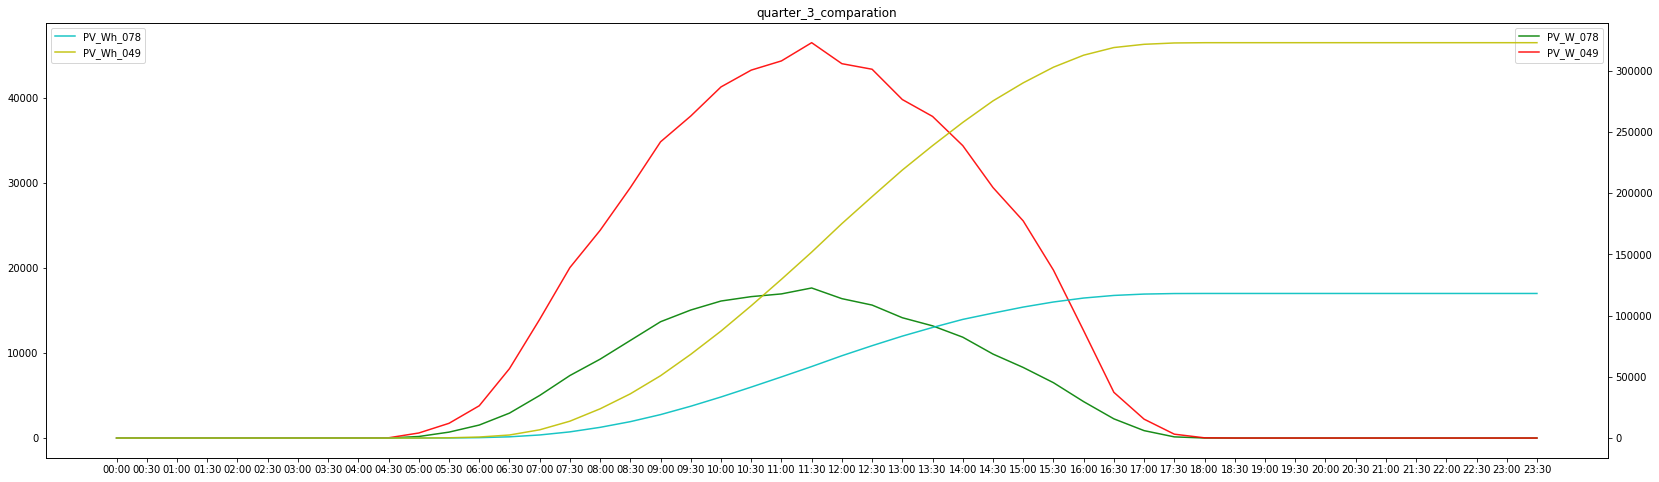

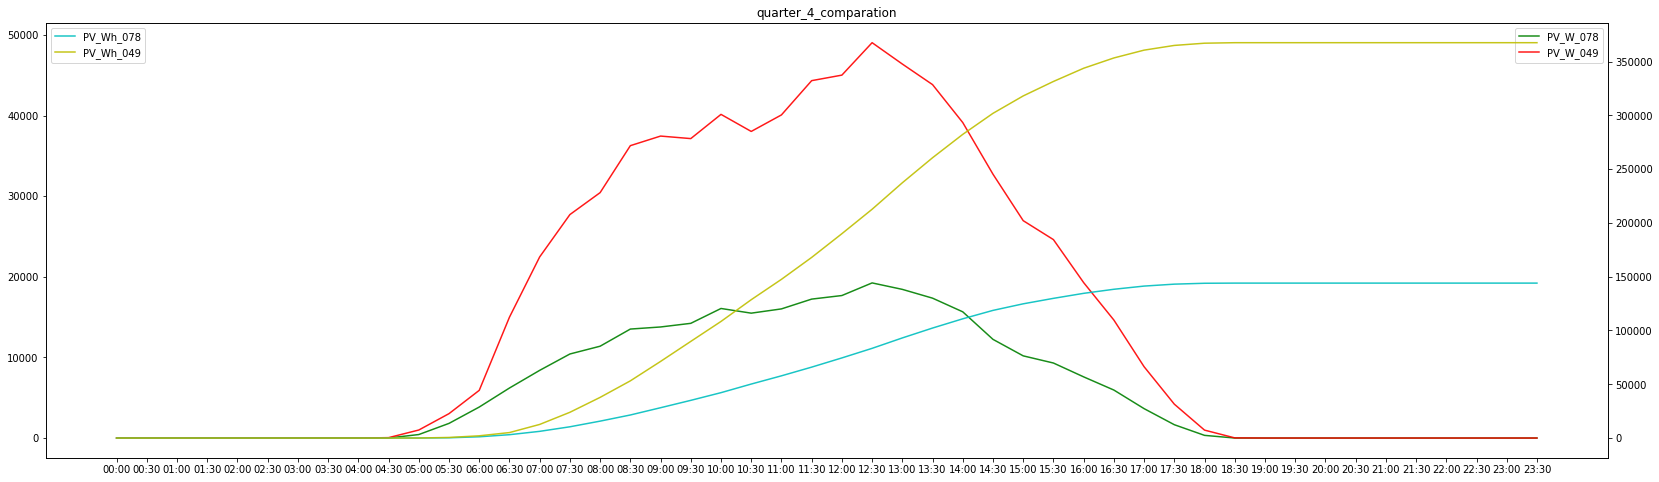

In [25]:
#the comparison of two buildings in each quarter
for i in range(1,5):
    #values for each quarter
    data=df_all_half_hour_total[df_all_half_hour_total.quarter==i]
    data_hour_1=pd.to_numeric(data['PV_W_078']).groupby(data['half_hour']).mean()
    data_hour_2=pd.to_numeric(data['PV_Wh_078']).groupby(data['half_hour']).mean()
    data_hour_3=pd.to_numeric(data['PV_W_049']).groupby(data['half_hour']).mean()
    data_hour_4=pd.to_numeric(data['PV_Wh_049']).groupby(data['half_hour']).mean()
    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    #primary axis
    ax1.plot(data_hour_1,label='PV_W_078', color='g', alpha=0.9)
    #primary axis
    ax1.plot(data_hour_3,label='PV_W_049', color='r', alpha=0.9)
    #secondary axis
    ax2.plot(data_hour_2, label='PV_Wh_078', color='c', alpha=0.9)
    #secondary axis
    ax2.plot(data_hour_4, label='PV_Wh_049', color='y', alpha=0.9)
    plt.title("quarter_{}_comparation".format(i))
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    plt.savefig("quarter_{}_comparation".format(i),dpi=400)
    plt.show()   

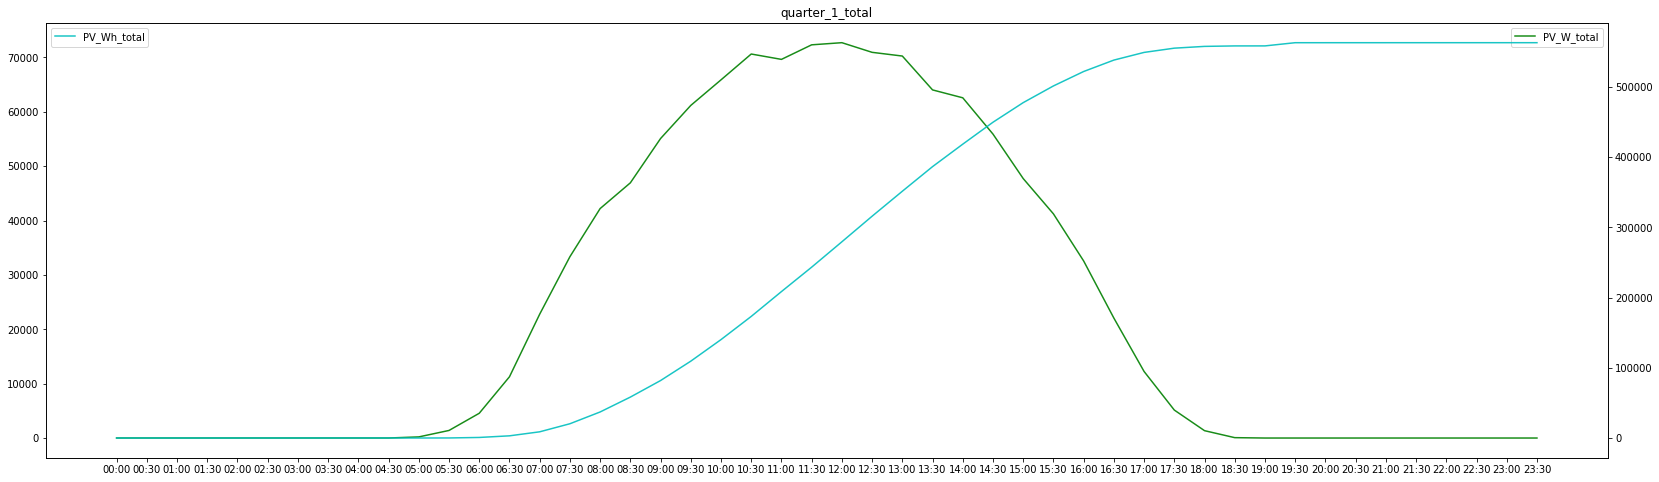

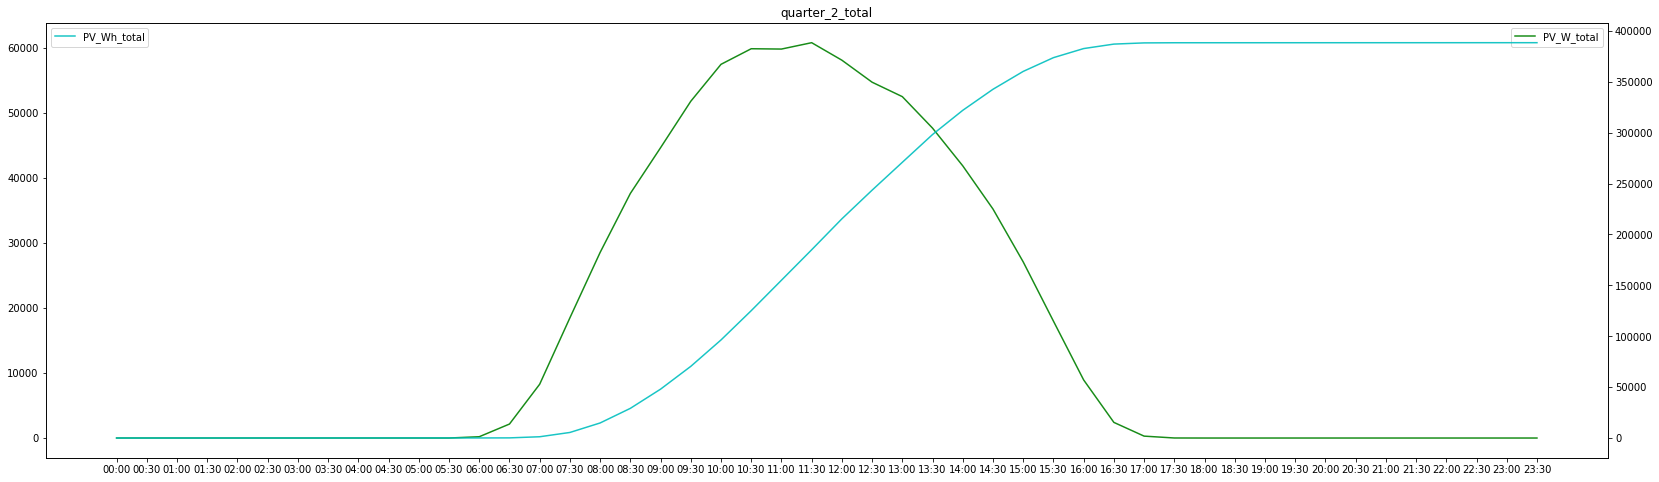

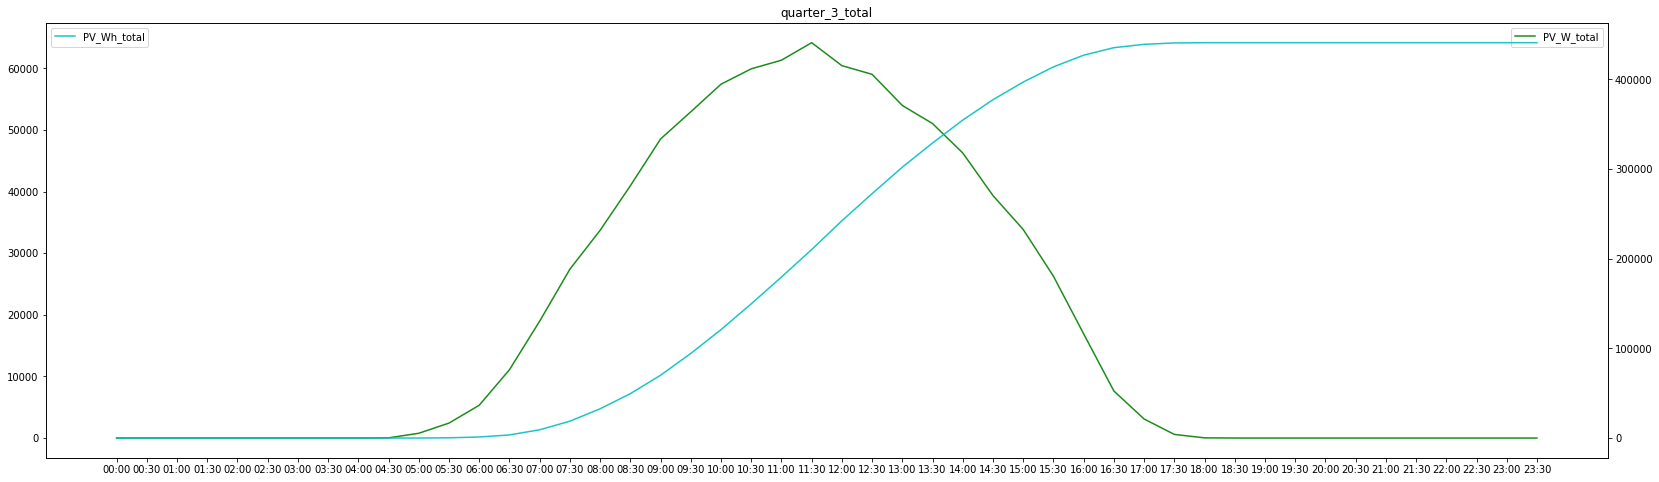

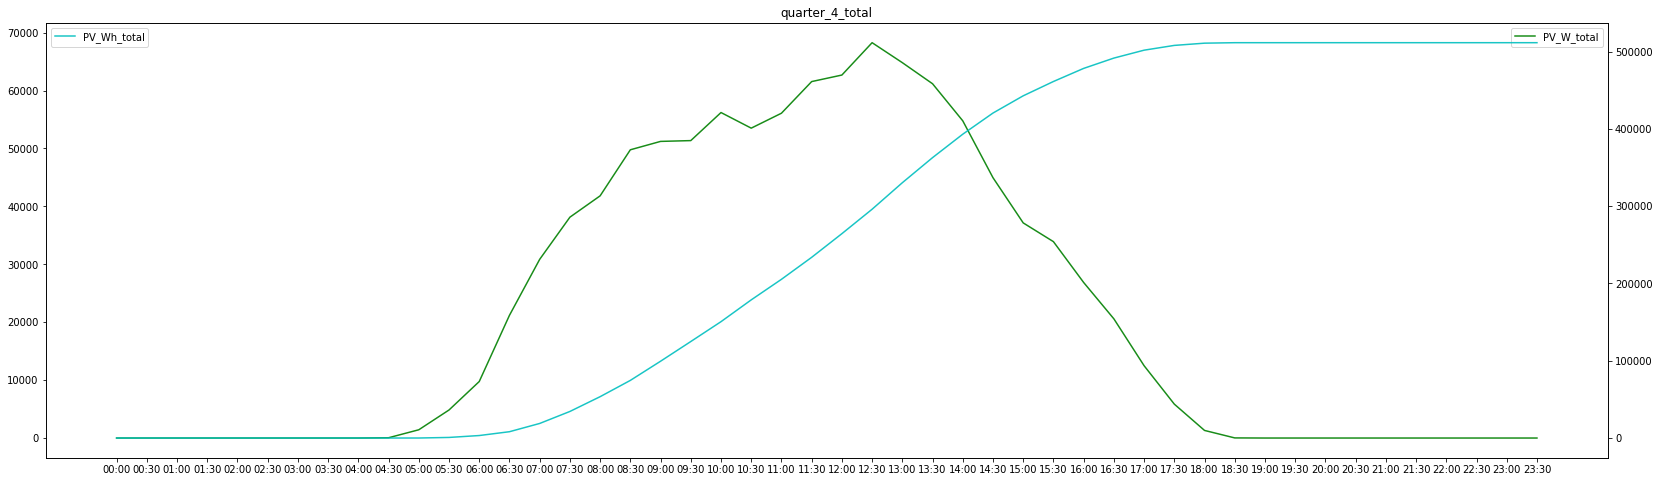

In [26]:
#the combination of two buildings
df_all_half_hour_total['PV_W_total']=df_all_half_hour_total['PV_W_078']+df_all_half_hour_total['PV_W_049']
df_all_half_hour_total['PV_Wh_total']=df_all_half_hour_total['PV_Wh_078']+df_all_half_hour_total['PV_Wh_049']
#the total data of two buildings
df_all_half_hour_total 
for i in range(1,5):
    #values for each quarter
    data=df_all_half_hour_total[df_all_half_hour_total.quarter==i]
    data_hour_1=pd.to_numeric(data['PV_W_total']).groupby(data['half_hour']).mean()
    data_hour_2=pd.to_numeric(data['PV_Wh_total']).groupby(data['half_hour']).mean()

    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    #primary axis
    ax1.plot(data_hour_1,label='PV_W_total', color='g', alpha=0.9)
    #secondary axis
    ax2.plot(data_hour_2, label='PV_Wh_total', color='c', alpha=0.9)

    plt.title("quarter_{}_total".format(i))
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    plt.savefig("quarter_{}_total".format(i),dpi=400)
    plt.show()   